In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dc-comics/dc-comics.csv


![image](https://wallpaperaccess.com/full/224562.jpg)(https://wallpaperaccess.com/full/224562.jpg)

### In 1938, DC Comics made its mark by publishing the inaugural Superman story in Action Comics no. 1. This groundbreaking character's immense popularity paved the way for the emergence of the costumed superhero genre, which has remained a cornerstone of the comic book industry ever since. Alongside Superman, DC Comics introduced a host of superheroes during the Golden Age of comics, most notably Batman (1939) and Wonder Woman (1941). To further capitalize on the success of these iconic characters, Licensing Corporation of America, initially known as Superman Inc., was established as a division of National Periodicals. This entity played a pivotal role in marketing DC's diverse character roster through a wide array of products, while also overseeing their adaptation and integration into various media platforms (https://www.britannica.com/topic/DC-Comics#ref314123).

### In this exploration, we aim to uncover the connections among the different attributes of DC Comics characters, revealing how they shape the vast universe. By analyzing how these characters' attributes influence one another, we can gain a better understanding of our favorite heroes and villains. Join us as we reveal patterns and associations that make the DC Comics universe come alive.

# DATA PREPARATION AND CLEANING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/dc-comics/dc-comics.csv')

In [4]:
print(df)

      page_id                          name  \
0        1422          Batman (Bruce Wayne)   
1       23387         Superman (Clark Kent)   
2        1458    Green Lantern (Hal Jordan)   
3        1659      James Gordon (New Earth)   
4        1576   Richard Grayson (New Earth)   
...       ...                           ...   
6891    66302       Nadine West (New Earth)   
6892   283475    Warren Harding (New Earth)   
6893   283478  William Harrison (New Earth)   
6894   283471  William McKinley (New Earth)   
6895   150660            Mookie (New Earth)   

                                   urlslug               ID            ALIGN  \
0             \/wiki\/Batman_(Bruce_Wayne)  Secret Identity  Good Characters   
1            \/wiki\/Superman_(Clark_Kent)  Secret Identity  Good Characters   
2       \/wiki\/Green_Lantern_(Hal_Jordan)  Secret Identity  Good Characters   
3         \/wiki\/James_Gordon_(New_Earth)  Public Identity  Good Characters   
4      \/wiki\/Richard_Grayson_(New

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   ALIVE             6893 non-null   object 
 9   APPEARANCES       6541 non-null   float64
 10  FIRST APPEARANCE  6827 non-null   object 
 11  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 646.6+ KB


> ### *As seen above, the columns 'APPPEARANCES' and 'YEAR' need to be converted as numeric datatype.*
> ### *The first three columns have no null entries. The other columns will be dealt with later.*

In [6]:
df['APPEARANCES'] = pd.to_numeric(df['APPEARANCES'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Check DataFrame if changes took effect
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [7]:
# Check for missing values
missing_values = df.isnull()  # or df.isna()

# Count the number of missing values per column
missing_counts = missing_values.sum()

# Calculate the percentage of missing values per column
missing_percentages = (missing_counts / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Sort the DataFrame by the missing count in descending order
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)

# Display the missing values information
print(missing_data)

                  Missing Count  Missing Percentage
EYE                        3628           52.610209
HAIR                       2274           32.975638
ID                         2013           29.190835
ALIGN                       601            8.715197
APPEARANCES                 355            5.147912
SEX                         125            1.812645
FIRST APPEARANCE             69            1.000580
YEAR                         69            1.000580
ALIVE                         3            0.043503
page_id                       0            0.000000
name                          0            0.000000
urlslug                       0            0.000000


In [8]:
columns_to_fill = ['EYE', 'HAIR', 'ID', 'ALIGN', 'SEX', 'ALIVE']

for column in columns_to_fill:
    df[column].fillna('Unknown', inplace=True)
    
# Replace 'Identity Unknown' with 'Unknown' in 'ID' column
df['ID'] = df['ID'].replace('Identity Unknown', 'Unknown')

In [9]:
# Drop rows with null entries in 'APPEARANCES' and 'YEAR' columns
df.dropna(subset=['APPEARANCES', 'YEAR'], inplace=True)

# Display the summary of the modified DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 0 to 6531
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6481 non-null   int64  
 1   name              6481 non-null   object 
 2   urlslug           6481 non-null   object 
 3   ID                6481 non-null   object 
 4   ALIGN             6481 non-null   object 
 5   EYE               6481 non-null   object 
 6   HAIR              6481 non-null   object 
 7   SEX               6481 non-null   object 
 8   ALIVE             6481 non-null   object 
 9   APPEARANCES       6481 non-null   float64
 10  FIRST APPEARANCE  6481 non-null   object 
 11  YEAR              6481 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 658.2+ KB


In [10]:
# Remove unnecessary columns
columns_to_drop = ['page_id', 'urlslug', 'FIRST APPEARANCE']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check DataFrame if changes took place
print(df.columns)

Index(['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'YEAR'],
      dtype='object')


In [12]:
# Inspect the number of unique values in all categorical coulmns
cat_columns = df[['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE']]
cat_columns.nunique()

name     6481
ID          3
ALIGN       5
EYE        18
HAIR       18
SEX         5
ALIVE       3
dtype: int64

In [13]:
# Iterate over each column and print the unique values
for column in cat_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")

Column: name
Unique Values: ['Batman (Bruce Wayne)' 'Superman (Clark Kent)'
 'Green Lantern (Hal Jordan)' ... 'Diablo the Horse (New Earth)'
 'Scott Scanlon (New Earth)' 'Gareth (New Earth)']

Column: ID
Unique Values: ['Secret Identity' 'Public Identity' 'Unknown']

Column: ALIGN
Unique Values: ['Good Characters' 'Bad Characters' 'Neutral Characters' 'Unknown'
 'Reformed Criminals']

Column: EYE
Unique Values: ['Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Purple Eyes' 'Black Eyes'
 'White Eyes' 'Red Eyes' 'Photocellular Eyes' 'Hazel Eyes' 'Amber Eyes'
 'Yellow Eyes' 'Unknown' 'Grey Eyes' 'Pink Eyes' 'Violet Eyes' 'Gold Eyes'
 'Orange Eyes' 'Auburn Hair']

Column: HAIR
Unique Values: ['Black Hair' 'Brown Hair' 'White Hair' 'Blond Hair' 'Red Hair' 'Unknown'
 'Green Hair' 'Strawberry Blond Hair' 'Grey Hair' 'Silver Hair'
 'Orange Hair' 'Purple Hair' 'Gold Hair' 'Blue Hair' 'Reddish Brown Hair'
 'Pink Hair' 'Violet Hair' 'Platinum Blond Hair']

Column: SEX
Unique Values: ['Male Characters' 'Fem

> ### *As seen above, there are a lot of unique values in the categorical columns. To facilitate statistical analyses later, these values will be aggregated into three groups based on similarities. The values in the column 'name' will not be aggregated.*

In [14]:
# Define the mapping of unique alignment to groups
alignment_mapping = {
    'Bad Characters': 'bad',
    'Good Characters': 'good',
    'Unknown': 'unknown or neutral',
    'Neutral Characters': 'unknown or neutral',
    'Reformed Criminals': 'good',
}

# Create a new column 'AlignGroup' based on the mapping
df['AlignGroup'] = df['ALIGN'].map(alignment_mapping)

In [15]:
# Define the mapping of unique eye colors to groups
eye_color_mapping = {
    'Unknown': 'others',
    'Blue Eyes': 'light',
    'Brown Eyes': 'dark',
    'Black Eyes': 'dark',
    'Green Eyes': 'light',
    'Red Eyes': 'others',
    'White Eyes': 'light',
    'Yellow Eyes': 'light',
    'Photocellular Eyes': 'others',
    'Grey Eyes': 'light',
    'Hazel Eyes': 'light',
    'Purple Eyes': 'light',
    'Violet Eyes': 'light',
    'Orange Eyes': 'light',
    'Gold Eyes': 'light',
    'Auburn Hair': 'others',
    'Pink Eyes': 'light',
    'Amber Eyes': 'light'
}

# 'Auburn Hair' was found in the column, but it is assumed to be an error. Anyhow, it was considered as a color for the eyes. 
# Create a new column 'EyeGroup' based on the mapping
df['EyeGroup'] = df['EYE'].map(eye_color_mapping)

In [16]:
# Define the mapping of unique hair colors to groups
hair_color_mapping = {
    'Unknown': 'others',
    'Black Hair': 'dark',
    'Brown Hair': 'dark',
    'Blond Hair': 'light',
    'Red Hair': 'dark',
    'White Hair': 'light',
    'Grey Hair': 'light',
    'Green Hair': 'light',
    'Blue Hair': 'light',
    'Purple Hair': 'light',
    'Strawberry Blond Hair': 'light',
    'Orange Hair': 'light',
    'Pink Hair': 'light',
    'Gold Hair': 'light',
    'Violet Hair': 'light',
    'Silver Hair': 'light',
    'Reddish Brown Hair': 'dark',
    'Platinum Blond Hair': 'light'
}

# Create a new column 'HairGroup' based on the mapping
df['HairGroup'] = df['HAIR'].map(hair_color_mapping)

In [17]:
# Define the mapping of unique sex to groups
sex_mapping = {
    'Male Characters': 'male',
    'Female Characters': 'female',
    'Unknown': 'others',
    'Genderless Characters': 'others',
    'Transgender Characters': 'others',
}

# Create a new column 'SexGroup' based on the mapping
df['SexGroup'] = df['SEX'].map(sex_mapping)

print(df)

                              name               ID               ALIGN  \
0             Batman (Bruce Wayne)  Secret Identity     Good Characters   
1            Superman (Clark Kent)  Secret Identity     Good Characters   
2       Green Lantern (Hal Jordan)  Secret Identity     Good Characters   
3         James Gordon (New Earth)  Public Identity     Good Characters   
4      Richard Grayson (New Earth)  Secret Identity     Good Characters   
...                            ...              ...                 ...   
6527     Gypper Zilich (New Earth)          Unknown             Unknown   
6528      Robert Mason (New Earth)  Secret Identity  Neutral Characters   
6529  Diablo the Horse (New Earth)          Unknown     Good Characters   
6530     Scott Scanlon (New Earth)  Public Identity             Unknown   
6531            Gareth (New Earth)          Unknown             Unknown   

             EYE        HAIR              SEX              ALIVE  APPEARANCES  \
0      Blue Eyes  

In [18]:
# Convert string columns to lowercase for consistency
string_columns = ['ID','ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE']
df[string_columns] = df[string_columns].apply(lambda x: x.str.lower())

In [19]:
# Remove leading/trailing whitespaces in string columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())

# Display the summary of the modified DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 0 to 6531
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         6481 non-null   object 
 1   ID           6481 non-null   object 
 2   ALIGN        6481 non-null   object 
 3   EYE          6481 non-null   object 
 4   HAIR         6481 non-null   object 
 5   SEX          6481 non-null   object 
 6   ALIVE        6481 non-null   object 
 7   APPEARANCES  6481 non-null   float64
 8   YEAR         6481 non-null   float64
 9   AlignGroup   6481 non-null   object 
 10  EyeGroup     6481 non-null   object 
 11  HairGroup    6481 non-null   object 
 12  SexGroup     6481 non-null   object 
dtypes: float64(2), object(11)
memory usage: 708.9+ KB


In [20]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dc-comics.csv', index=False)

# EXPLORATORY ANALYSIS AND VISUALIZATION

In [21]:
# Load the cleaned dataset into a DataFrame
df_cleaned = pd.read_csv('cleaned_dc-comics.csv')

print(df_cleaned)

                              name               ID               ALIGN  \
0             Batman (Bruce Wayne)  secret identity     good characters   
1            Superman (Clark Kent)  secret identity     good characters   
2       Green Lantern (Hal Jordan)  secret identity     good characters   
3         James Gordon (New Earth)  public identity     good characters   
4      Richard Grayson (New Earth)  secret identity     good characters   
...                            ...              ...                 ...   
6476     Gypper Zilich (New Earth)          unknown             unknown   
6477      Robert Mason (New Earth)  secret identity  neutral characters   
6478  Diablo the Horse (New Earth)          unknown     good characters   
6479     Scott Scanlon (New Earth)  public identity             unknown   
6480            Gareth (New Earth)          unknown             unknown   

             EYE        HAIR              SEX              ALIVE  APPEARANCES  \
0      blue eyes  

## Identity

In [22]:
# Get value counts of 'ID' column
id_counts = df_cleaned['ID'].value_counts()
id_counts

public identity    2342
secret identity    2275
unknown            1864
Name: ID, dtype: int64

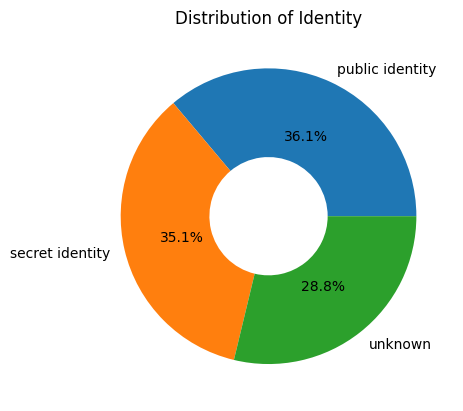

In [23]:
# Set the labels and sizes for the donut chart
labels = id_counts.index
sizes = id_counts.values

# Create a donut chart with data labels
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width': 0.6})

# Add a circle at the center to create the donut shape
circle = plt.Circle((0, 0), 0.3, color='white')
plt.gca().add_artist(circle)

# Add a title
plt.title('Distribution of Identity')

# Display the chart
plt.show()

## Alignment

In [24]:
align_counts = df_cleaned.ALIGN.value_counts()
align_counts

bad characters        2709
good characters       2669
unknown                558
neutral characters     542
reformed criminals       3
Name: ALIGN, dtype: int64

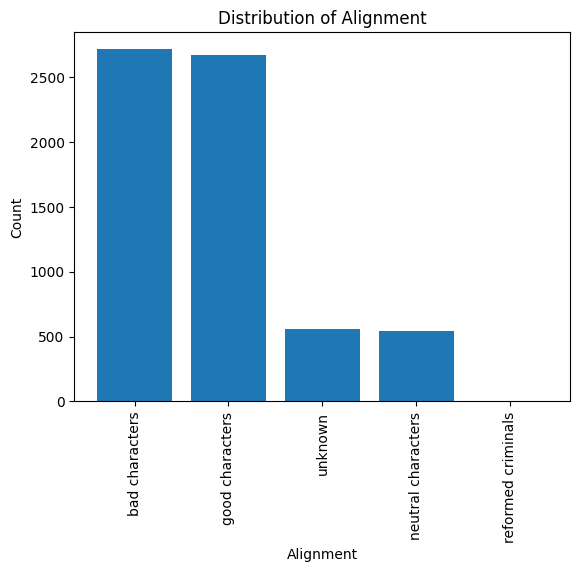

In [25]:
# Set the x and y values for the bar plot
x = align_counts.index
y = align_counts.values

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.title('Distribution of Alignment')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Eye Color

In [26]:
eye_counts = df_cleaned.EYE.value_counts()
eye_counts

unknown               3381
blue eyes             1070
brown eyes             835
black eyes             395
green eyes             267
red eyes               186
white eyes             112
yellow eyes             76
photocellular eyes      42
grey eyes               36
hazel eyes              23
purple eyes             14
violet eyes             10
gold eyes                9
orange eyes              7
auburn hair              7
pink eyes                6
amber eyes               5
Name: EYE, dtype: int64

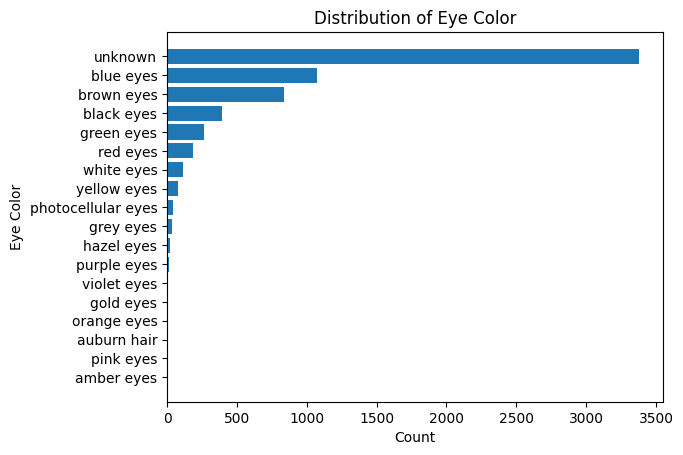

In [27]:
# Sort the values and labels in descending order
eye_counts = eye_counts.sort_values(ascending=True)

# Set the y and x values for the horizontal bar plot
y = eye_counts.index
x = eye_counts.values

# Create a horizontal bar plot
plt.barh(y, x)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Eye Color')
plt.title('Distribution of Eye Color')

# Display the plot
plt.show()


## Hair Color

In [28]:
hair_counts = df_cleaned.HAIR.value_counts()
hair_counts

unknown                  2069
black hair               1496
brown hair               1102
blond hair                720
red hair                  438
white hair                328
grey hair                 147
green hair                 40
blue hair                  37
purple hair                30
strawberry blond hair      27
orange hair                21
pink hair                  10
gold hair                   5
violet hair                 4
silver hair                 3
reddish brown hair          2
platinum blond hair         2
Name: HAIR, dtype: int64

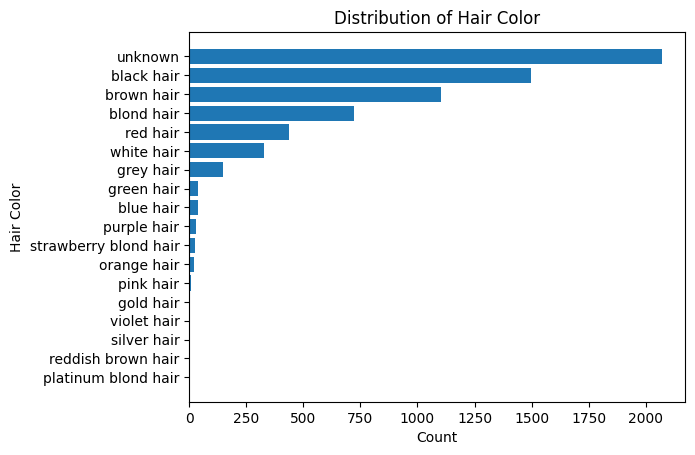

In [29]:
# Sort the values and labels in descending order
hair_counts = hair_counts.sort_values(ascending=True)

# Set the y and x values for the horizontal bar plot
y = hair_counts.index
x = hair_counts.values

# Create a horizontal bar plot
plt.barh(y, x)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Hair Color')
plt.title('Distribution of Hair Color')

# Display the plot
plt.show()


## Sex

In [30]:
sex_counts = df_cleaned.SEX.value_counts()
sex_counts

male characters           4487
female characters         1861
unknown                    113
genderless characters       19
transgender characters       1
Name: SEX, dtype: int64

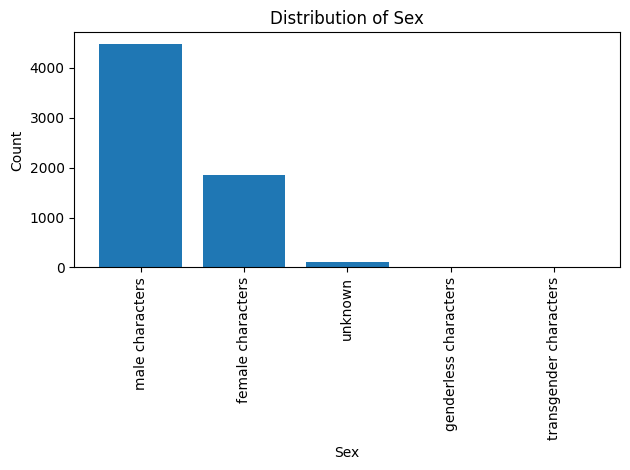

In [31]:
# Get value counts of 'SEX' column
sex_counts = df_cleaned['SEX'].value_counts()

# Set the x and y values for the bar plot
x = sex_counts.index
y = sex_counts.values

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust the layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Life Status

In [32]:
alive_counts = df_cleaned.ALIVE.value_counts()
alive_counts

living characters      4863
deceased characters    1616
unknown                   2
Name: ALIVE, dtype: int64

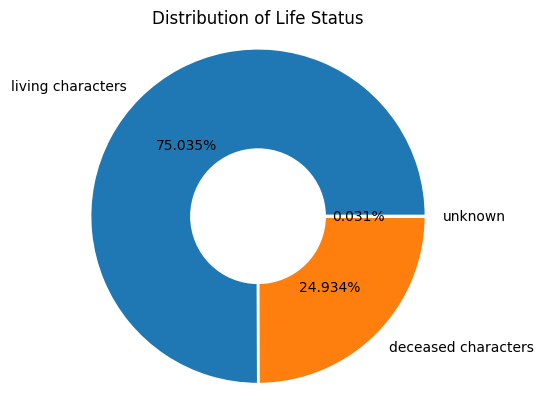

In [33]:
# Set the labels and corresponding values for the donut chart
labels = alive_counts.index
sizes = alive_counts.values

# Create a donut chart
plt.pie(sizes, labels=labels, wedgeprops={'edgecolor': 'white', 'linewidth': 2}, autopct='%.3f%%')

# Add a white circle in the center to create the donut shape
circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Add a title
plt.title('Distribution of Life Status')

# Display the plot
plt.axis('equal')
plt.show()


## Number of Appearances

In [34]:
appearances_stats = df_cleaned.APPEARANCES.describe()
appearances_stats

count    6481.000000
mean       23.781978
std        87.761084
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max      3093.000000
Name: APPEARANCES, dtype: float64

> ### From the statistics above, the mean value is higher than that of the median. Such condition suggests that the number of appearances is positively skewed.

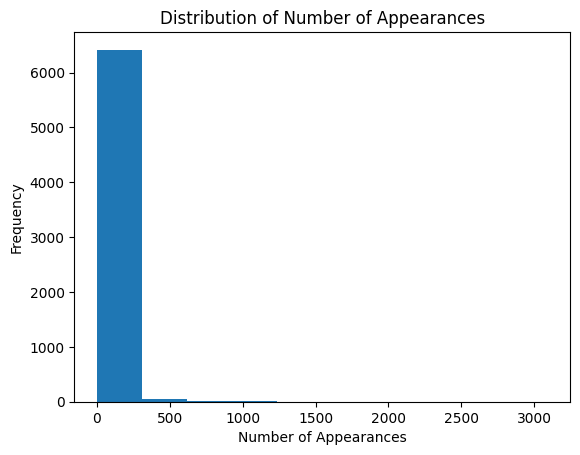

In [35]:
# Create the histogram
plt.hist(df['APPEARANCES'], bins=10)
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Appearances')
plt.show()

> ### *The graph above shows that  majority of the DC characters falls on the lower side of the distribution, while there are fewer occurrences of higher values.*

# ASKING AND ANSWERING QUESTIONS

## Q1: What is the trend of the number of first appearances by DC characters across the years?

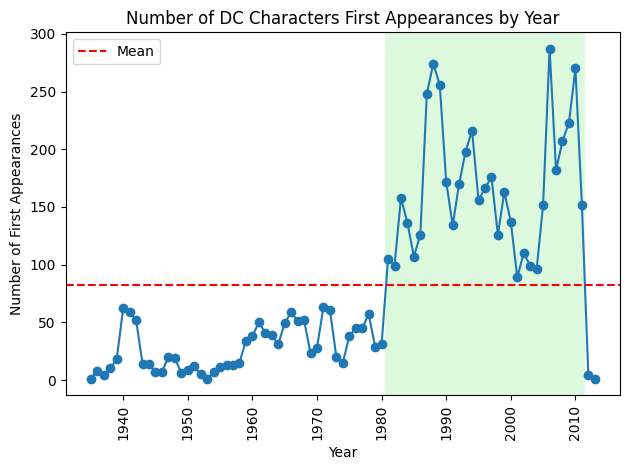

In [36]:
# Sort the DataFrame by the 'YEAR' column
dc_characters_sorted = df_cleaned.sort_values('YEAR')

# Group the sorted DataFrame by 'YEAR' and count the unique characters
first_appearance_by_year = dc_characters_sorted.groupby('YEAR')['name'].nunique()

# Calculate the mean number of first appearances
mean_first_appearances = np.mean(first_appearance_by_year)

# Create a line plot
plt.plot(first_appearance_by_year.index, first_appearance_by_year.values, marker='o')

# Add a vertical span for years above the mean
above_mean_years = first_appearance_by_year.index[first_appearance_by_year.values > mean_first_appearances]
for year in above_mean_years:
    plt.axvspan(year - 0.5, year + 0.5, facecolor='lightgreen', alpha=0.3)

plt.axhline(mean_first_appearances, color='r', linestyle='--', label='Mean')

plt.xlabel('Year')
plt.ylabel('Number of First Appearances')
plt.title('Number of DC Characters First Appearances by Year')
plt.xticks(rotation=90)
plt.tight_layout()

# Add a legend
plt.legend()

plt.show()

> ### *The graph above shows that from 1981 to 2011, the number of DC characters appearing for the first time surpassed the average of approximately 86.* 

## Q2: Is there an association among DC character attributes such as identity, alignment, eye color, hair color, sex, and life status when paired together?

### Since the variables involved are categorical, the Chi-square test of independence or the Fisher's exact test is suitable for determining if associations exist between pairs. We will use scipy.stats, a powerful tool for statistical analysis and hypothesis testing.

### The groups created earlier for the categorical variables involved wiil be tested for certain assumptions prior to the application of the suitable statistical tool. Let us start with the first pair: identity and alignment.

In [37]:
# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['ID'], df_cleaned['AlignGroup'])

# Check if more than 20% of the expected frequencies are below 5
if (contingency_table.values < 5).mean() > 0.2:
    # Convert the contingency table to 2x2
    if contingency_table.shape[0] == 3 and contingency_table.shape[1] == 3:
        # Combine the 2nd and 3rd rows
        contingency_table.iloc[1] += contingency_table.iloc[2]
        contingency_table = contingency_table.iloc[:2]

        # Combine the 2nd and 3rd columns
        contingency_table.iloc[:, 1] += contingency_table.iloc[:, 2]
        contingency_table = contingency_table.iloc[:, :2]

    # Perform Fisher's exact test
    oddsratio, p_value = fisher_exact(contingency_table)
    method = "Fisher's Exact Test"
else:
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    method = "Chi-square Test"

# Display the cross-tabulation with expected frequencies
cross_tab = pd.DataFrame(contingency_table.values, index=contingency_table.index, columns=contingency_table.columns)
expected_freq = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print('Cross-tabulation with Expected Frequencies:')
print(cross_tab)
print('\nExpected Frequencies:')
print(expected_freq)

# Print the results
print('\n' + method + ' results:')
print('P-value:', p_value)

# Set the significance level
alpha = 0.05

# Check if there is an association based on the p-value
if p_value < alpha:
    print('There is evidence of an association between identity and alignment.')
else:
    print('There is no evidence of an association between identity and alignment.')

Cross-tabulation with Expected Frequencies:
AlignGroup        bad  good  unknown or neutral
ID                                             
public identity   696  1225                 421
secret identity  1187   810                 278
unknown           826   637                 401

Expected Frequencies:
AlignGroup              bad        good  unknown or neutral
ID                                                         
public identity  978.935041  965.564573          397.500386
secret identity  950.929640  937.941676          386.128684
unknown          779.135319  768.493751          316.370930

Chi-square Test results:
P-value: 3.0850648992473735e-65
There is evidence of an association between identity and alignment.


### Let us iterate the procedure with the remaining pairs of variables.

In [38]:
# Define the column pairs
pairs = [
    ("ID", "EyeGroup"), ("ID", "HairGroup"), ("ID", "SexGroup"), ("ID", "ALIVE"),
    ("AlignGroup", "EyeGroup"), ("AlignGroup", "HairGroup"), ("AlignGroup", "SexGroup"), ("AlignGroup", "ALIVE"),
    ("EyeGroup", "HairGroup"), ("EyeGroup", "SexGroup"), ("EyeGroup", "ALIVE"),
    ("HairGroup", "SexGroup"), ("HairGroup", "ALIVE"), ("SexGroup", "ALIVE")
]

# Iterate over the column pairs
for pair in pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(df_cleaned[pair[0]], df_cleaned[pair[1]])

    # Display the cross-tabulation
    print('Contingency Table for Columns:', pair)
    print(contingency_table)

    # Check if more than 20% of the expected frequencies are below 5
    if (contingency_table.values < 5).mean() > 0.2:
        # Convert the contingency table to 2x2
        if contingency_table.shape[0] == 3 and contingency_table.shape[1] == 3:
            # Combine the 2nd and 3rd rows
            contingency_table.iloc[1] += contingency_table.iloc[2]
            contingency_table = contingency_table.iloc[:2]

            # Combine the 2nd and 3rd columns
            contingency_table.iloc[:, 1] += contingency_table.iloc[:, 2]
            contingency_table = contingency_table.iloc[:, :2]

        # Perform Fisher's exact test
        oddsratio, p_value = fisher_exact(contingency_table)
        method = "Fisher's Exact Test"
    else:
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        method = "Chi-square Test"

    # Print the results
    print('\n' + method + ' results for Columns:', pair)
    print('P-value:', p_value)

    # Set the significance level
    alpha = 0.05

    # Check if there is an association based on the p-value
    if p_value < alpha:
        print('There is evidence of an association between', pair[0], 'and', pair[1])
    else:
        print('There is no evidence of an association between', pair[0], 'and', pair[1])
    print('-------------------------------------------------------------------------')

Contingency Table for Columns: ('ID', 'EyeGroup')
EyeGroup         dark  light  others
ID                                  
public identity   544    709    1089
secret identity   506    672    1097
unknown           180    254    1430

Chi-square Test results for Columns: ('ID', 'EyeGroup')
P-value: 1.4073726183597063e-99
There is evidence of an association between ID and EyeGroup
-------------------------------------------------------------------------
Contingency Table for Columns: ('ID', 'HairGroup')
HairGroup        dark  light  others
ID                                  
public identity  1241    605     496
secret identity  1076    463     736
unknown           721    306     837

Chi-square Test results for Columns: ('ID', 'HairGroup')
P-value: 6.297545400515045e-58
There is evidence of an association between ID and HairGroup
-------------------------------------------------------------------------
Contingency Table for Columns: ('ID', 'SexGroup')
SexGroup         female  male  o

## Q3: Is there a significant difference in DC characters' number of appearances when grouped by attributes such as identity, alignment, eye color, hair color, sex, and life status?

### This code below performs hypothesis testing based on two assumptions: normality and equality of variances. It uses Shapiro-Wilk test to check normality and Levene's test to check equality of variances. If the assumptions are met, the code performs ANOVA (Analysis of Variance) test to determine if there is significant difference between groups. If the assumptions are not met, the code performs Kruskal-Wallis test instead.

### Let us start with the hypothesis: There is no significant difference in DC characters' number of appearances when grouped by identity?

In [39]:
# Check the assumptions

# Shapiro-Wilk test for normality
shapiro_results = df_cleaned.groupby('ID')['APPEARANCES'].apply(lambda x: stats.shapiro(x.dropna())[1])
print("Shapiro-Wilk p-values:\n", shapiro_results)

# Levene's test for equality of variances
levene_results = stats.levene(df_cleaned.loc[df_cleaned['ID'] == 'public identity', 'APPEARANCES'].dropna(),
                              df_cleaned.loc[df_cleaned['ID'] == 'secret identity', 'APPEARANCES'].dropna(),
                              df_cleaned.loc[df_cleaned['ID'] == 'unknown', 'APPEARANCES'].dropna())
print("Levene's test p-value:", levene_results.pvalue)

alpha = 0.05  # significance level

# Determine the appropriate test based on the assumptions

if shapiro_results.min() >= alpha and levene_results.pvalue >= alpha:
    # Assumptions met, perform ANOVA
    fvalue, pvalue = stats.f_oneway(df_cleaned.loc[df_cleaned['ID'] == 'public identity', 'APPEARANCES'].dropna(),
                                    df_cleaned.loc[df_cleaned['ID'] == 'secret identity', 'APPEARANCES'].dropna(),
                                    df_cleaned.loc[df_cleaned['ID'] == 'unknown', 'APPEARANCES'].dropna())

    if pvalue < alpha:
        print("ANOVA: Reject the null hypothesis. There is a significant difference between groups.")
    else:
        print("ANOVA: Fail to reject the null hypothesis. There is no significant difference between groups.")
else:
    # Assumptions not met, perform Kruskal-Wallis
    kw_statistic, kw_pvalue = stats.kruskal(df_cleaned.loc[df_cleaned['ID'] == 'public identity', 'APPEARANCES'].dropna(),
                                            df_cleaned.loc[df_cleaned['ID'] == 'secret identity', 'APPEARANCES'].dropna(),
                                            df_cleaned.loc[df_cleaned['ID'] == 'unknown', 'APPEARANCES'].dropna())

    if kw_pvalue < alpha:
        print("Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.")
    else:
        print("Kruskal-Wallis: Fail to reject the null hypothesis. There is no significant difference between groups.")

Shapiro-Wilk p-values:
 ID
public identity    0.0
secret identity    0.0
unknown            0.0
Name: APPEARANCES, dtype: float64
Levene's test p-value: 1.0731199985568157e-20
Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.


### Let us iterate the procedure with the remaining pairs of variables.

In [40]:
# Define the pairs
pairs = [('APPEARANCES', 'AlignGroup'),
         ('APPEARANCES', 'EyeGroup'),
         ('APPEARANCES', 'HairGroup'),
         ('APPEARANCES', 'SexGroup')]

alpha = 0.05  # significance level

for x_col, group_col in pairs:
    print(f"----- Testing {x_col} by {group_col} -----")

    # Check the assumptions

    # Shapiro-Wilk test for normality
    shapiro_results = df_cleaned.groupby(group_col)[x_col].apply(lambda x: stats.shapiro(x.dropna())[1])
    print("Shapiro-Wilk p-values:\n", shapiro_results)

    # Levene's test for equality of variances
    levene_results = stats.levene(df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[0], x_col].dropna(),
                                  df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[1], x_col].dropna(),
                                  df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[2], x_col].dropna(),
                                 )
    print("Levene's test p-value:", levene_results.pvalue)

    # Determine the appropriate test based on the assumptions

    if shapiro_results.min() >= alpha and levene_results.pvalue >= alpha:
        # Assumptions met, perform ANOVA
        fvalue, pvalue = stats.f_oneway(df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[0], x_col].dropna(),
                                        df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[1], x_col].dropna(),
                                        df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[2], x_col].dropna())

        if pvalue < alpha:
            print("ANOVA: Reject the null hypothesis. There is a significant difference between groups.")
        else:
            print("ANOVA: Fail to reject the null hypothesis. There is no significant difference between groups.")
    else:
        # Assumptions not met, perform Kruskal-Wallis
        kw_statistic, kw_pvalue = stats.kruskal(df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[0], x_col].dropna(),
                                                df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[1], x_col].dropna(),
                                                df_cleaned.loc[df_cleaned[group_col] == shapiro_results.index[2], x_col].dropna())

        if kw_pvalue < alpha:
            print("Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.")
        else:
            print("Kruskal-Wallis: Fail to reject the null hypothesis. There is no significant difference between groups.")

    print("\n")

----- Testing APPEARANCES by AlignGroup -----
Shapiro-Wilk p-values:
 AlignGroup
bad                   0.0
good                  0.0
unknown or neutral    0.0
Name: APPEARANCES, dtype: float64
Levene's test p-value: 1.7505314471200686e-25
Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.


----- Testing APPEARANCES by EyeGroup -----
Shapiro-Wilk p-values:
 EyeGroup
dark      0.0
light     0.0
others    0.0
Name: APPEARANCES, dtype: float64
Levene's test p-value: 1.9045769718817084e-55
Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.


----- Testing APPEARANCES by HairGroup -----
Shapiro-Wilk p-values:
 HairGroup
dark      0.0
light     0.0
others    0.0
Name: APPEARANCES, dtype: float64
Levene's test p-value: 9.50228112464265e-10
Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.


----- Testing APPEARANCES by SexGroup -----
Shapiro-Wilk p-values:
 SexGrou

### For the life status ('ALIVE' column), there is insufficient number for the category 'unknown' to perform either ANOVA or Kruskal-Wallis test. Hence, to test if a significant difference exists in the number of DC characters' appearances when grouped by life status, only the categories with valid counts are included.

In [41]:
# Define the column names
x_col = 'APPEARANCES'
group_col = 'ALIVE'

# Subset the DataFrame for the specific column and group
data = df_cleaned[[x_col, group_col]].dropna()

# Filter groups with at least three non-null values
valid_groups = data.groupby(group_col).filter(lambda x: x[x_col].count() >= 3)

# Perform the Shapiro-Wilk test for normality
shapiro_results = valid_groups.groupby(group_col).apply(lambda x: stats.shapiro(x[x_col])[1])
print("Shapiro-Wilk p-values:\n", shapiro_results)

# Perform Levene's test for equality of variances
levene_results = stats.levene(*[group[x_col] for _, group in valid_groups.groupby(group_col)])
print("Levene's test p-value:", levene_results.pvalue)

# Determine the appropriate test based on the assumptions
alpha = 0.05

if shapiro_results.min() >= alpha and levene_results.pvalue >= alpha:
    # Assumptions met, perform ANOVA
    fvalue, pvalue = stats.f_oneway(*[group[x_col] for _, group in valid_groups.groupby(group_col)])

    if pvalue < alpha:
        print("ANOVA: Reject the null hypothesis. There is a significant difference between groups.")
    else:
        print("ANOVA: Fail to reject the null hypothesis. There is no significant difference between groups.")
else:
    # Assumptions not met, perform Kruskal-Wallis
    kw_statistic, kw_pvalue = stats.kruskal(*[group[x_col] for _, group in valid_groups.groupby(group_col)])

    if kw_pvalue < alpha:
        print("Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.")
    else:
        print("Kruskal-Wallis: Fail to reject the null hypothesis. There is no significant difference between groups.")

Shapiro-Wilk p-values:
 ALIVE
deceased characters    0.0
living characters      0.0
dtype: float64
Levene's test p-value: 0.10723801670418354
Kruskal-Wallis: Reject the null hypothesis. There is a significant difference between groups.


# CONCLUSIONS

### Based on the obtained results, the following conclusions are hereby offered:

1. ### There has been an increase in the number of DC characters appearing for the first time from 1981 to 2011, surpassing the average of approximately 86.
 
2. ### Associations exist among the attributes of DC characters except for the following pairs: identity and life status, eye color and life status, and  hair color and life status.
  
3. ### There are significant differences in the number of DC character appearances when grouped by attributes.

# FUTURE WORK

### These areas of future work can provide valuable insights for character development, marketing, and forecasting in the DC universe.

1. ### Predictive Modeling: Develop models to forecast future trends in character appearances.

2. ### Longitudinal Analysis: Extend the analysis over a longer time period to observe historical trends.

# REFERENCES

* ### *DC Comics. https://www.britannica.com/topic/DC-Comics*

* ### *DC comics dataset.  https://www.kaggle.com/datasets/arunasivapragasam/dc-comics*

* ### *Matplotlib User Guide. https://matplotlib.org/stable/users/index.html*

* ### *Pandas User Guide. https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html*

* ### *SciPy User Guide. https://docs.scipy.org/doc/scipy/tutorial/index.html*